In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/Users/federicoclaudi/Documents/Github/LocomotionControl")

from data.dbase.db_tables import (
    Session,
    Mouse,
    ValidatedSession,
    Tracking,
    TrackingLinearized,
    TrackingBP,
    SessionCondition,
    LocomotionBouts,
    Surgery, 
    Probe, 
    Recording, 
    Unit,
)

In [4]:
# tracking = pd.DataFrame(
#     (Tracking * TrackingBP * TrackingLinearized & "bpname='body'").fetch()
# )
# tracking.head()

In [34]:
bouts = pd.DataFrame(LocomotionBouts & "complete='true'" & f"direction='outbound'" & "duration<12" & "gcoord_delta > 0.925")
print(len(bouts))

# sort bouts by name
bouts = bouts.sort_values(by=['name'])
print(bouts.head())

1838
      mouse_id                      name  start_frame  end_frame  duration  \
0   AAA1110750  FC_210413_AAA1110750_d11        45972      46353   6.35000   
29  AAA1110750  FC_210413_AAA1110750_d11       140333     140666   5.55000   
30  AAA1110750  FC_210413_AAA1110750_d11       142079     142375   4.93333   
31  AAA1110750  FC_210413_AAA1110750_d11       147812     148128   5.26667   
32  AAA1110750  FC_210413_AAA1110750_d11       150095     150447   5.86667   

   direction    color complete  start_roi  end_roi  gcoord_delta  
0   outbound  #F48FB1     true          0       12      0.990457  
29  outbound  #F48FB1     true          0       12      0.985434  
30  outbound  #F48FB1     true          0       12      0.985434  
31  outbound  #F48FB1     true          0       12      0.980914  
32  outbound  #F48FB1     true          0       12      0.989453  


mouse_id                                                   AAA1110750
name                                         FC_210413_AAA1110750_d11
bpname                                                           body
orientation         [62.03476840321434, 27.597154412423606, 303.48...
angular_velocity    [3722.0861041928606, -2066.2568394474442, -504...
speed               [3.458684244494069, 3.294688400708866, 3.03881...
acceleration        [3.458684244494069, -0.16399584378520293, -0.2...
u                   [3.458684244494069, 3.294688400708866, 3.03881...
udot                [3.458684244494069, -0.16399584378520293, -0.2...
theta               [88.29998161410536, 122.16316483727189, 113.11...
thetadot            [5297.998896846322, 2031.790993389991, -543.01...
thetadotdot         [5297.998896846322, -3266.207903456331, -2574....
x                   [4.22487303873943, 4.208310681361879, 4.215845...
y                   [17.302598404468583, 17.42819394025143, 17.406...
bp_speed            

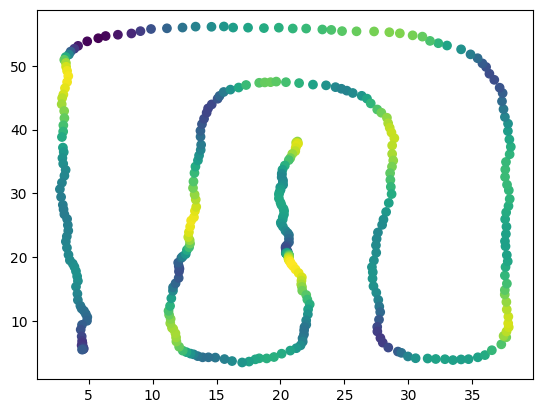

In [37]:

for (i, trial) in bouts.iterrows():
    name = trial['name']
    trial_tracking = pd.Series(
        (Tracking * TrackingBP * TrackingLinearized & "bpname='body'" & f"name='{name}'").fetch1()
    )
    print(trial_tracking)

    # plt.plot(trial_tracking.angular_velocity[1000:1400])

    # plt.plot(trial_tracking.thetadot[1000:1400])

    plt.scatter(trial_tracking.x[trial.start_frame:trial.end_frame], 
                        trial_tracking.y[trial.start_frame:trial.end_frame], 
                        # c=trial_tracking.thetadot[trial.start_frame:trial.end_frame],
                        # vmin=-500, vmax=500
                        c = trial_tracking.acceleration[trial.start_frame:trial.end_frame],
                        )

    break